<a href="https://colab.research.google.com/github/saptaksubhra/Unsupervised-ML---Online-Retail-Customer-Segmentation/blob/main/Unsupervised_ML_Project_Online_Retail_Customer_Segmentation_Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title : Online Retail Customer Segmentation
# Project Type : Unsupervised Machine Learning 
# Contribution : Individual
# Name : Saptaksubhra Bhattacharyya



# Problem Description
In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# Data Description

# Attribute Information:

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

* Description: Product (item) name. Nominal.

* Quantity: The quantities of each product (item) per transaction. Numeric.

* InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

* UnitPrice: Unit price. Numeric, Product price per unit in sterling.

* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

* Country: Country name. Nominal, the name of the country where each customer resides.


# Data Preparation

# Importing Required Libraries

In [ ]:
# To handle the dataset
import pandas as pd
import numpy as np

# For Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
from yellowbrick.cluster import SilhouetteVisualizer

# For getting optimal number of clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage
# To scale the dataset
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# metrics to evaluate the clusters
from sklearn.metrics import silhouette_score, silhouette_samples
# Clustering alorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
# Display utilities
from IPython.display import Markdown, display

# activating DND to disregard the warnings by goiing silent mode
import warnings
warnings.filterwarnings('ignore')

# setting default parameters for the figure of the plots
plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["figure.dpi"] = 160



In [ ]:
# Mounting Google Drive to have the access of the dataset of online retail
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Loading the dataset from online reatil csv file
df_OR = pd.read_excel('/content/drive/MyDrive/Almabetter Capstone Projects-Saptaksubhra Bhattacharyya/Unsupervised ML Project - Saptaksubhra Bhattacharyya/Online Retail.xlsx')

In [ ]:
# Gettiing the whole dataset
df_OR

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# Checking out top five rows
df_OR.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Checking out bottom five rows
df_OR.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# Let's check the shep of the dataset
df_OR.shape

(541909, 8)

In [ ]:
# Let's check all the columns existing in the dataset
df_OR.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Basic information of the dataset
df_OR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Let's have the statistical information of the dataset
df_OR.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Let's check number unique values in the dataset
for column in df_OR.columns:
  print(column, '::', df_OR[column].nunique())

InvoiceNo :: 25900
StockCode :: 4070
Description :: 4223
Quantity :: 722
InvoiceDate :: 23260
UnitPrice :: 1630
CustomerID :: 4372
Country :: 38


# Dataset Cleaning

In [ ]:
# Calculation of null values and percentage of those 
missing_data = df_OR.columns[df_OR.isnull().any()].tolist()

print('Number of null values is : ')
print(df_OR[missing_data].isnull().sum().sort_values(ascending = True))
print('**'*16)
print('Percentage of null values is : ')
print(round(df_OR[missing_data].isnull().sum().sort_values(ascending = True) / len(df_OR) * 100, 2))

Number of null values is : 
Description      1454
CustomerID     135080
dtype: int64
********************************
Percentage of null values is : 
Description     0.27
CustomerID     24.93
dtype: float64


# Observations:

* It is evident from the above result that 24.93% (almost 25% ) of the items purchased have not been assigned to any customer.
* Therefore, there is no use of the data without customers' assignment.
* Hence, it is better to drop off those rows with no customer's assignment as clusters can be constructed with the helping hand  'CustomerID' column.

In [ ]:
# Now, let's drop off those rows with null values.
df_OR.dropna(subset = ['CustomerID'], inplace = True)

In [ ]:
# Let's check number duplicate values in the dataset.
len(df_OR[df_OR.duplicated()])

5225

In [ ]:
# Dropping off duplicate rows
df_OR.drop_duplicates( inplace = True)

In [ ]:
# After dropping off duplicate rows, let's have a look how the new dataframe is.
df_OR.shape

(401604, 8)

In [ ]:
# Let's check datatype and the existence of null values in each coluimn of the new dataset.
df_OR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


It can be observed that there is no existence of null values in the new dataset from the above result.

# Feature Engineering

In [ ]:
# Let's split 'InvoiceDate' column.
df_OR['Year'] = df_OR['InvoiceDate'].apply(lambda x : x.year)
df_OR['Month'] = df_OR['InvoiceDate'].apply(lambda x : x.month_name())
df_OR['Day'] = df_OR['InvoiceDate'].apply(lambda x : x.day_name())
df_OR['Hour'] = df_OR['InvoiceDate'].apply(lambda x : x.hour)

In [ ]:
# Let's create a new feature named 'TotalAmount' by multiplying 'Quantity' with 'UnitPrice'.
df_OR['TotalAmount'] = df_OR['Quantity'] * df_OR['UnitPrice']

In [ ]:
# Creating a new feature 'TimeType' based on hours to define whether its Morning,Afternoon or Evening
df_OR['TimeType'] = np.where((df_OR["Hour"]>5)&(df_OR["Hour"]<18), np.where( df_OR["Hour"]<12, 'Morning','Afternoon'),'Evening')

In [ ]:
# 'InvoiceNo' starts with 'C' means cancellation.
# Let's see how many cancellations are available in the new dataset. That means that all invoice starting with 'C' will be printed.
df_OR['InvoiceNo'] = df_OR['InvoiceNo'].astype('str')
df_cancellation = df_OR[df_OR['InvoiceNo'].str.contains('C')]
df_cancellation


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,TotalAmount,TimeType
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010,December,Wednesday,9,-27.50,Morning
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,December,Wednesday,9,-4.65,Morning
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,December,Wednesday,10,-19.80,Morning
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,December,Wednesday,10,-6.96,Morning
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,December,Wednesday,10,-6.96,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011,December,Friday,9,-9.13,Morning
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011,December,Friday,10,-224.69,Morning
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011,December,Friday,11,-54.75,Morning
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011,December,Friday,11,-1.25,Morning


In [ ]:
# Dropping off those invoice starting with "C" from the new dataset
df_OR_C = df_OR[~df_OR['InvoiceNo'].str.contains('C')]

In [ ]:
# Printing those invoice which do not start with 'C'
df_OR_C

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,TotalAmount,TimeType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,December,Friday,12,10.20,Afternoon
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,December,Friday,12,12.60,Afternoon
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,December,Friday,12,16.60,Afternoon
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,December,Friday,12,16.60,Afternoon


# EDA (Exploratory Data Analysis)

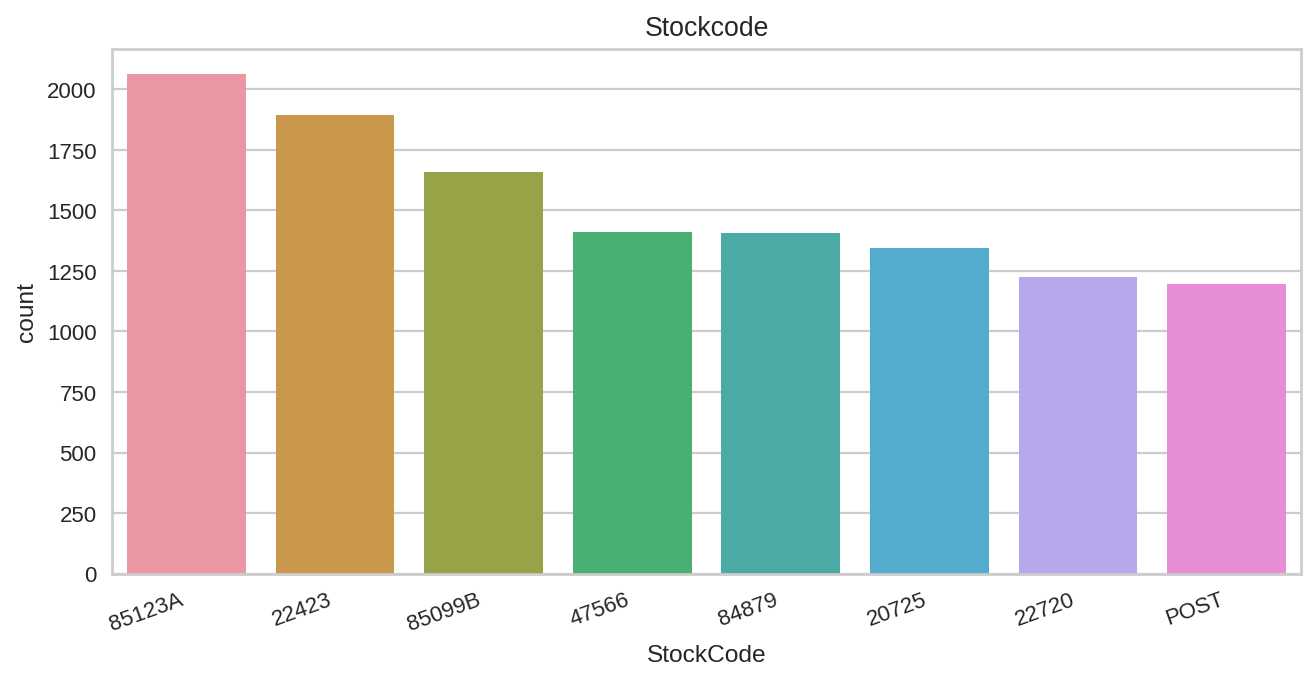

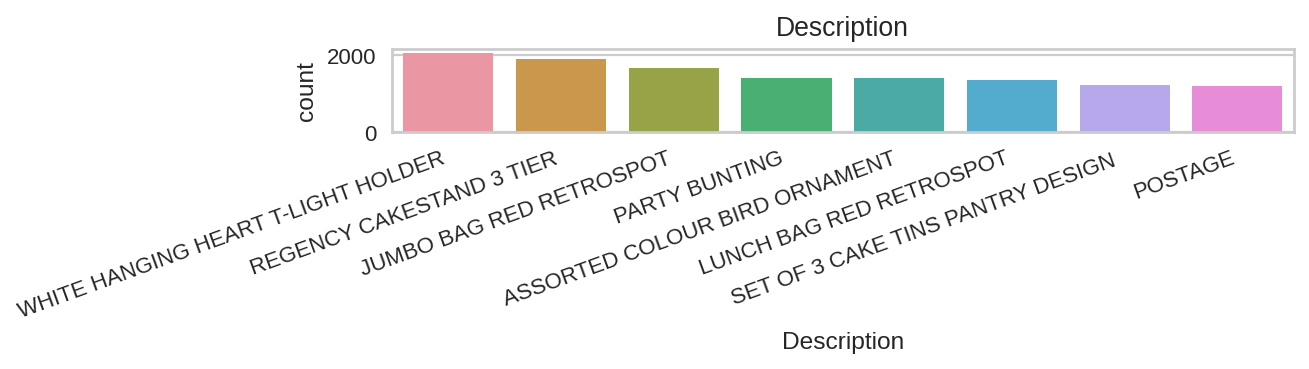

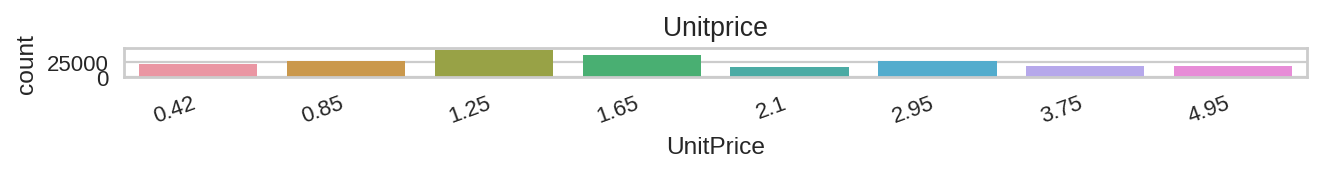

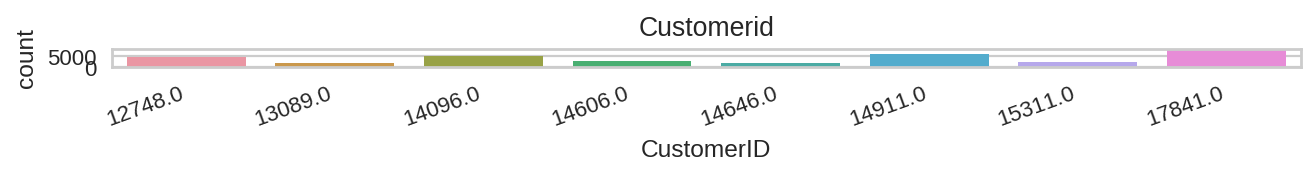

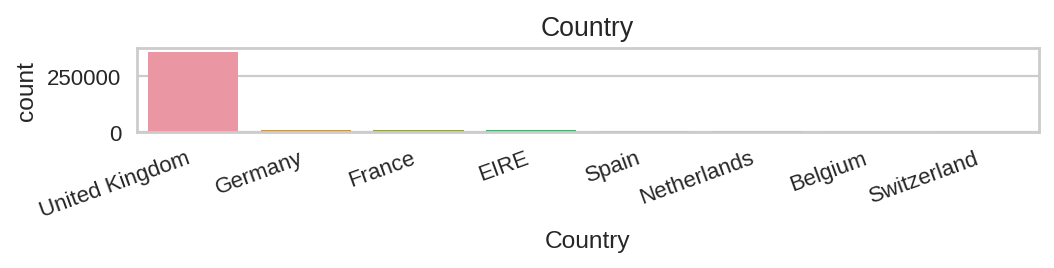

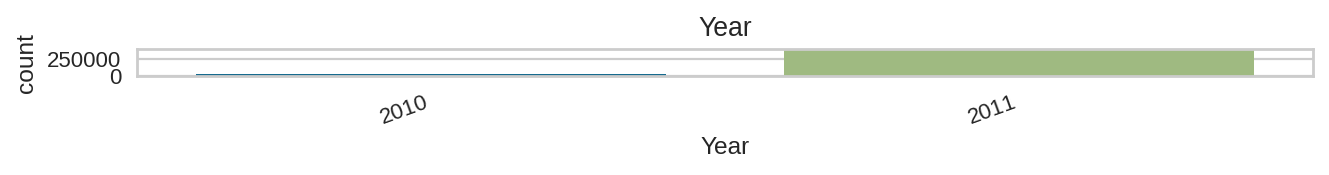

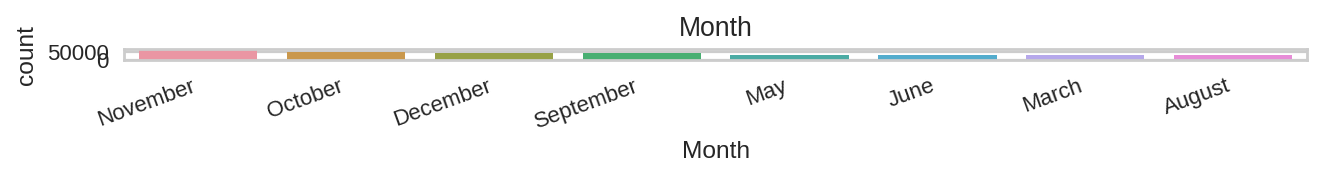

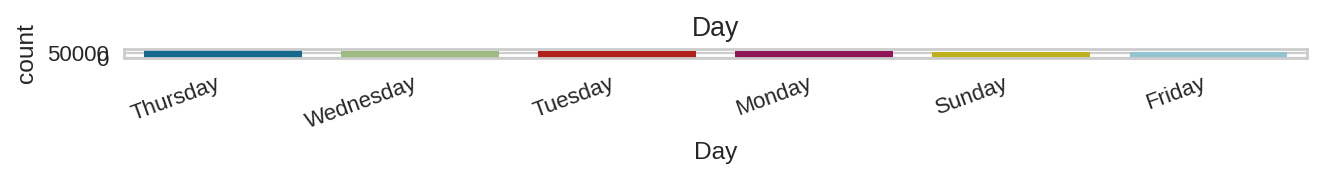

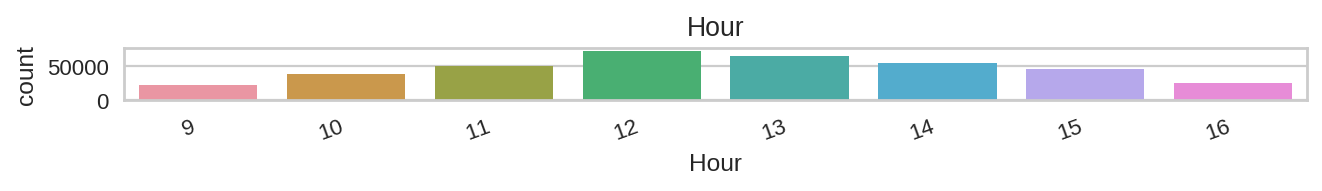

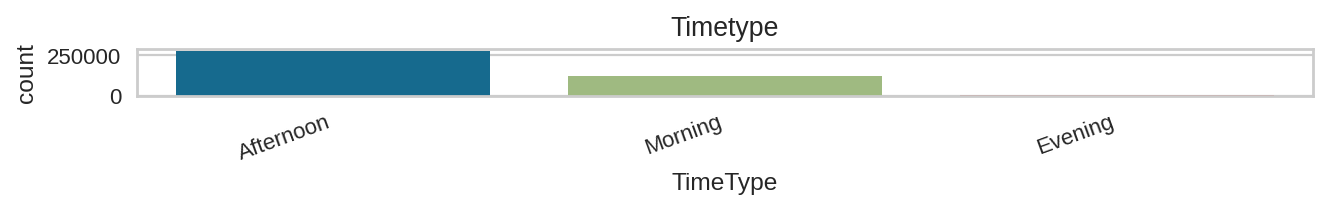

In [64]:
# Plotting top values on the basis of frequency in each column
T1 = ['StockCode', 'Description','UnitPrice', 'CustomerID', 'Country',
          'Year', 'Month','Day','Hour','TimeType']

plt.figure(figsize=(16,20))
for n,col in enumerate(T1):
  plt.subplot(5, 2, n+1)
  temp = df_OR[col].value_counts().reset_index().head(8)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()
  plt.show()

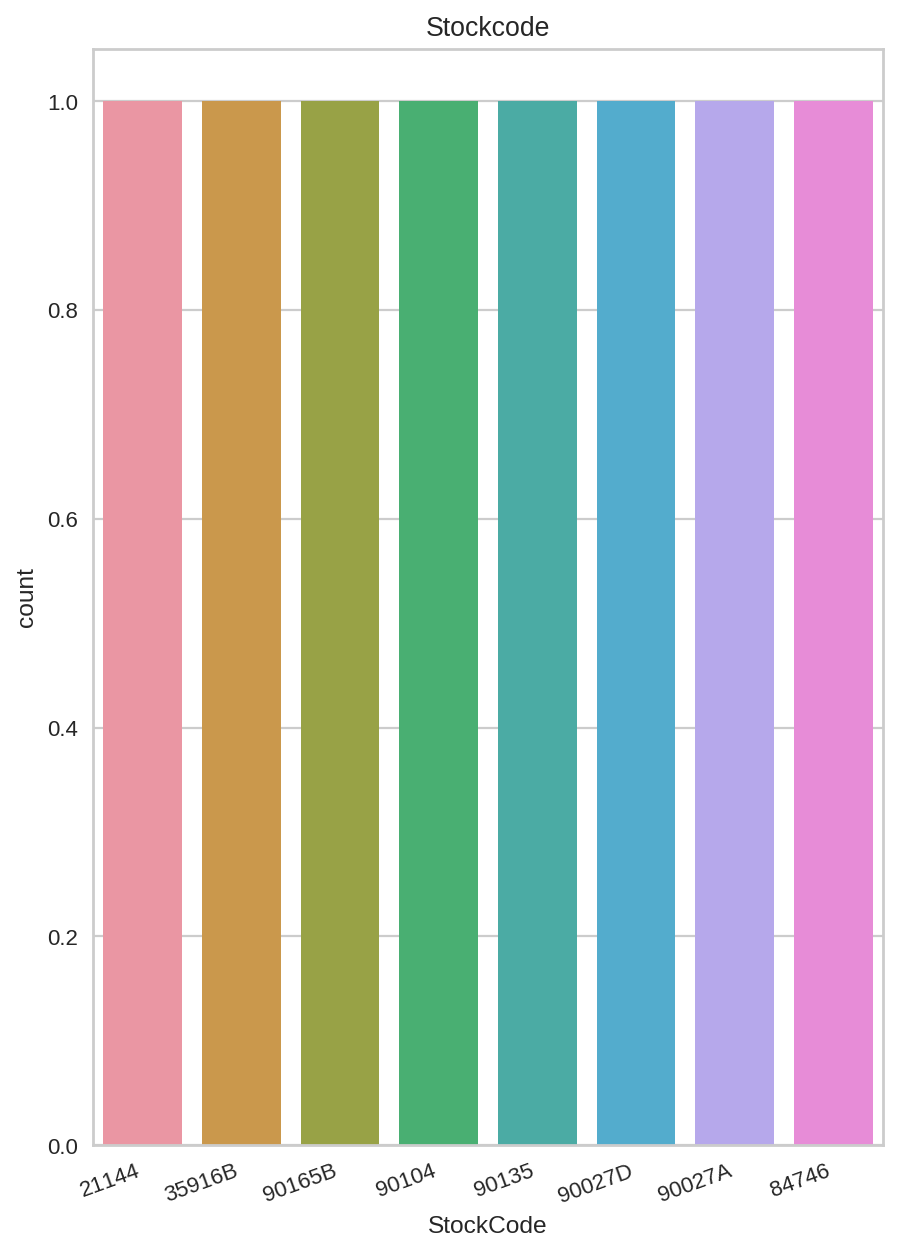

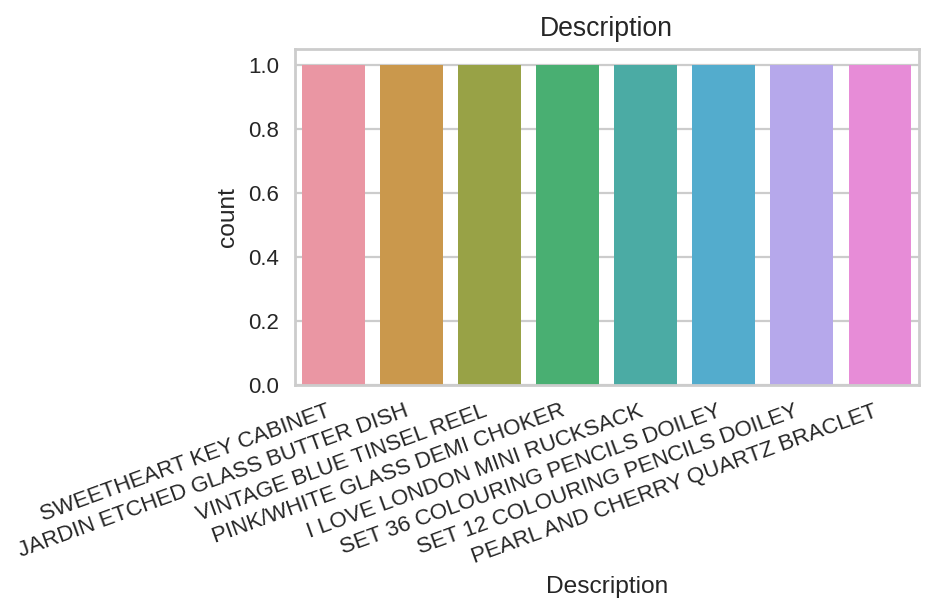

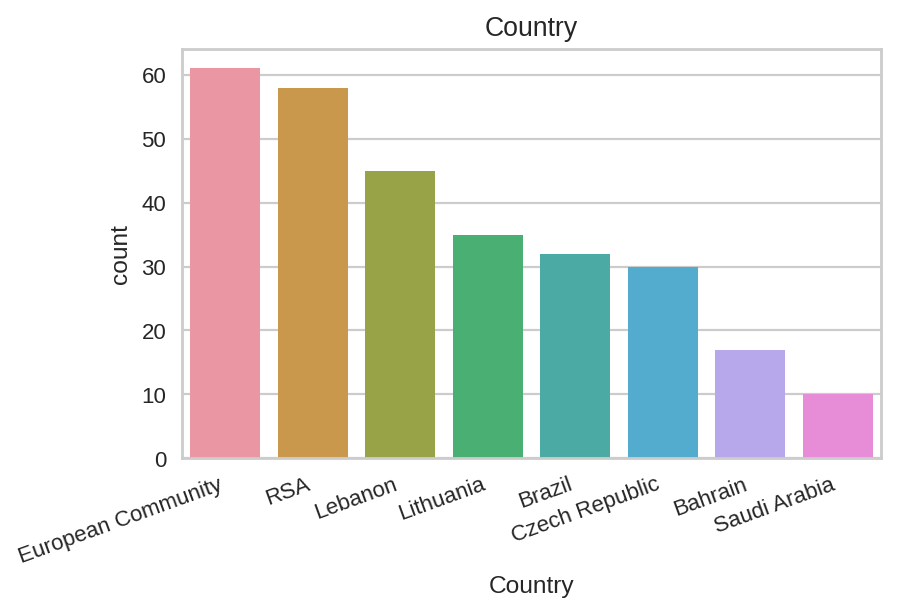

In [65]:
# Plotting bottom values on the basis of frequency in each column
T2 = ['StockCode', 'Description','Country']
plt.figure(figsize=(16,8))
for n,col in enumerate(T2):
  plt.subplot(1, 3, n+1)
  temp = df_OR[col].value_counts().reset_index().tail(8)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()
  plt.show()

# Observations:

* From the top values graphs on the basis of frequency in each column, it is evident that most number of customers are from United Kingdom. Very few customers are from Germany, France, and EIRE. The number of customers are almost negligible in Spain, Netherlands, Belgium, Switzerland.

* Most of the customers have purchased the gifts in September, October, November and December whereas the purchasing is very less in January, February and April.

* There are no orders placed on Saturdays. That means that it is a day off for the retailers.

* WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT are the most ordered products.

* Most of the customers have purchased the items in the afternoon whereas moderate numbers of customers have purchased the items in the morning and the least in the evening.

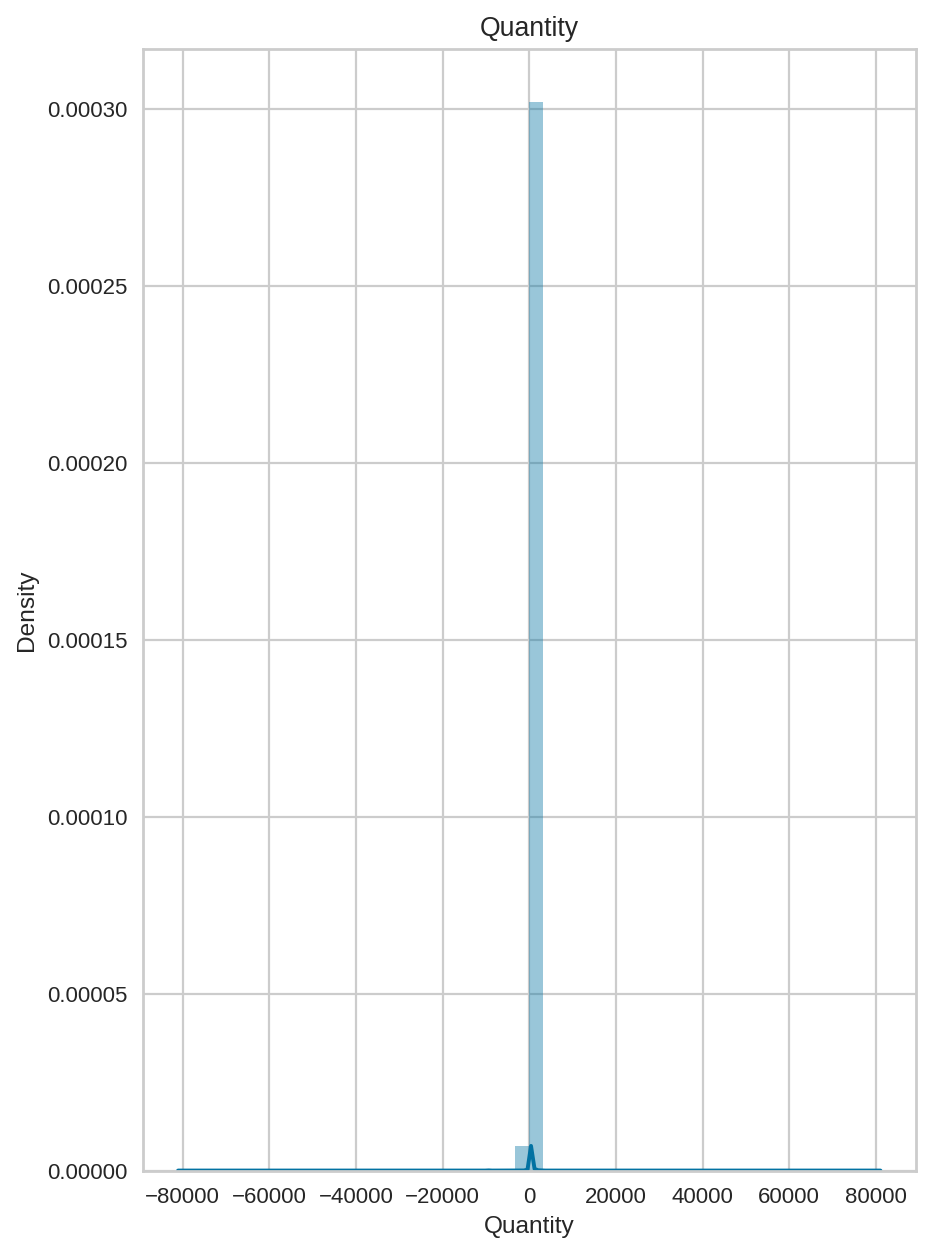

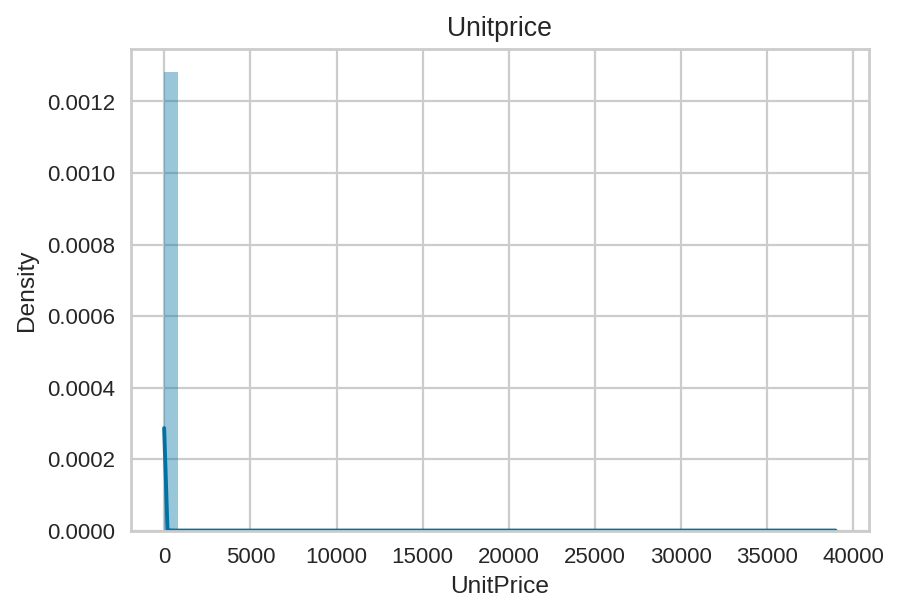

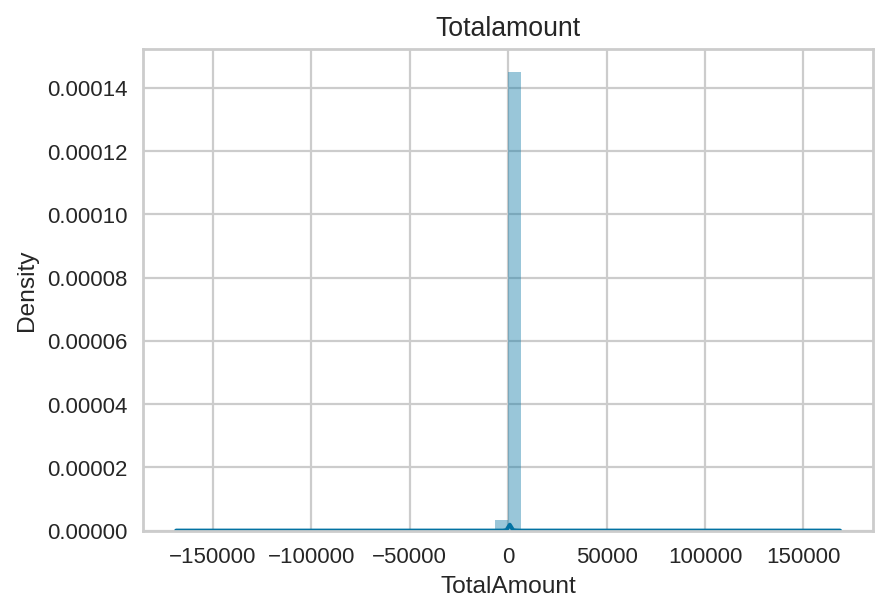

In [66]:
# Let's visualize all sorts of distributions in terms of 'Quantity', 'UnitPrice', 'TotalAmount'.
T3 = ['Quantity','UnitPrice','TotalAmount']
plt.figure(figsize=(16,8))
for n,col in enumerate(T3):
  plt.subplot(1, 3, n+1)
  sns.distplot(df_OR[col])
  plt.title(col.title())
  plt.tight_layout()
  plt.show()


# Observations:

* It shows a positively skewed distribution because most of the values are clustered around the left side of the distribution while the right tail of the distribution is longer, which means mean>median>mode.

* For symmetric graph mean=median=mode.

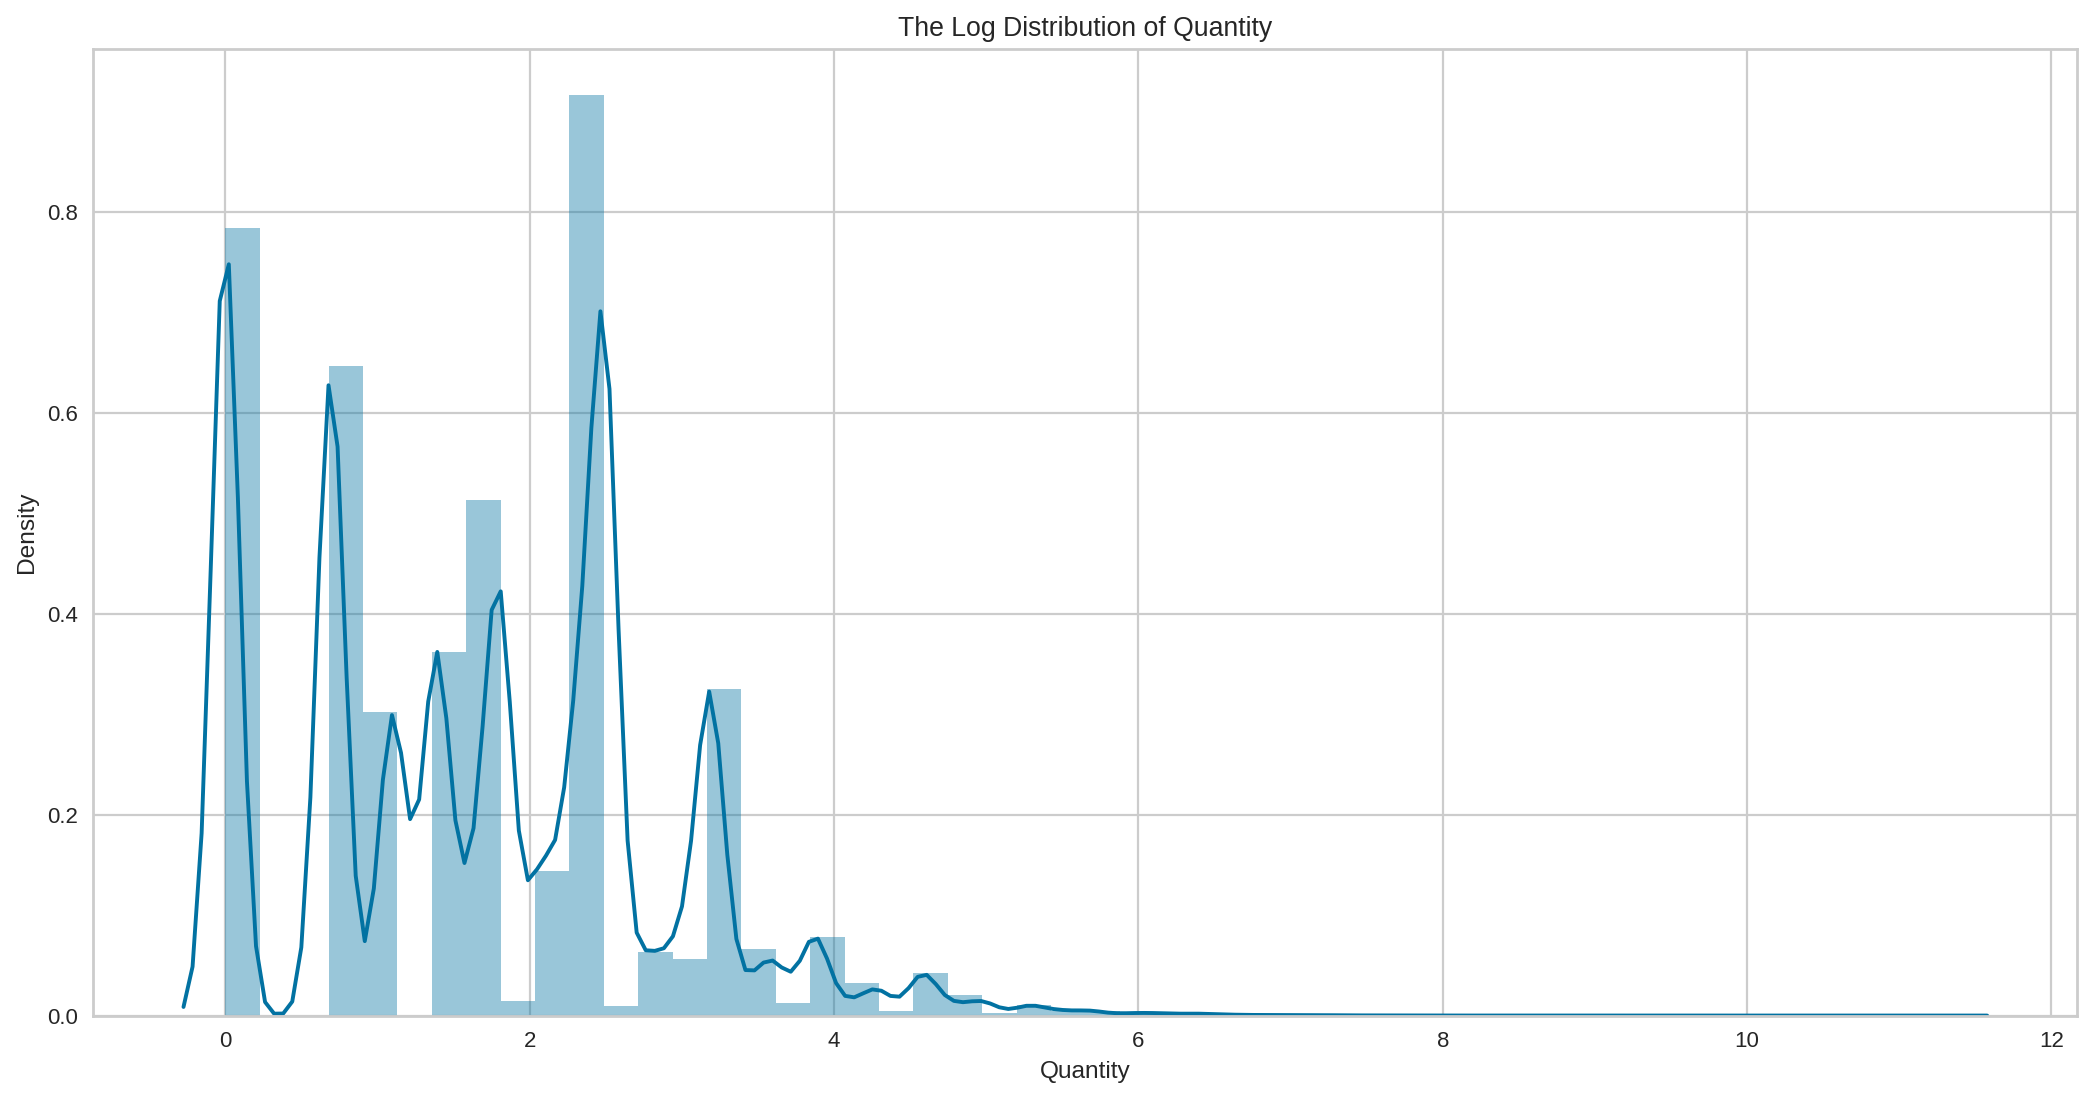

In [67]:
# Let's do the log transformation to make the distribution normal.
# Data Visualization Distribution after the log transformation of quantity
plt.figure(figsize = (16,8))
plt.title('The Log Distribution of Quantity')
sns.distplot(np.log(df_OR['Quantity']))
plt.show()

In [70]:
# Let's have a look at those countries from where most orders are placed.
country_inv = df_OR.groupby("Country").nunique()["InvoiceNo"].reset_index().sort_values("InvoiceNo",ascending= False)
country_inv.rename(columns={'InvoiceNo': 'Invoice_Count'}, inplace=True)
country_inv.head()

,Country,Invoice_Count
35,United Kingdom,19857
14,Germany,603
13,France,458
10,EIRE,319
3,Belgium,119


# Observation:
 
It can be observed that most of number of orders or purchasing are placed from United Kingdom followed by Germany, France, EIRE and Belgium.

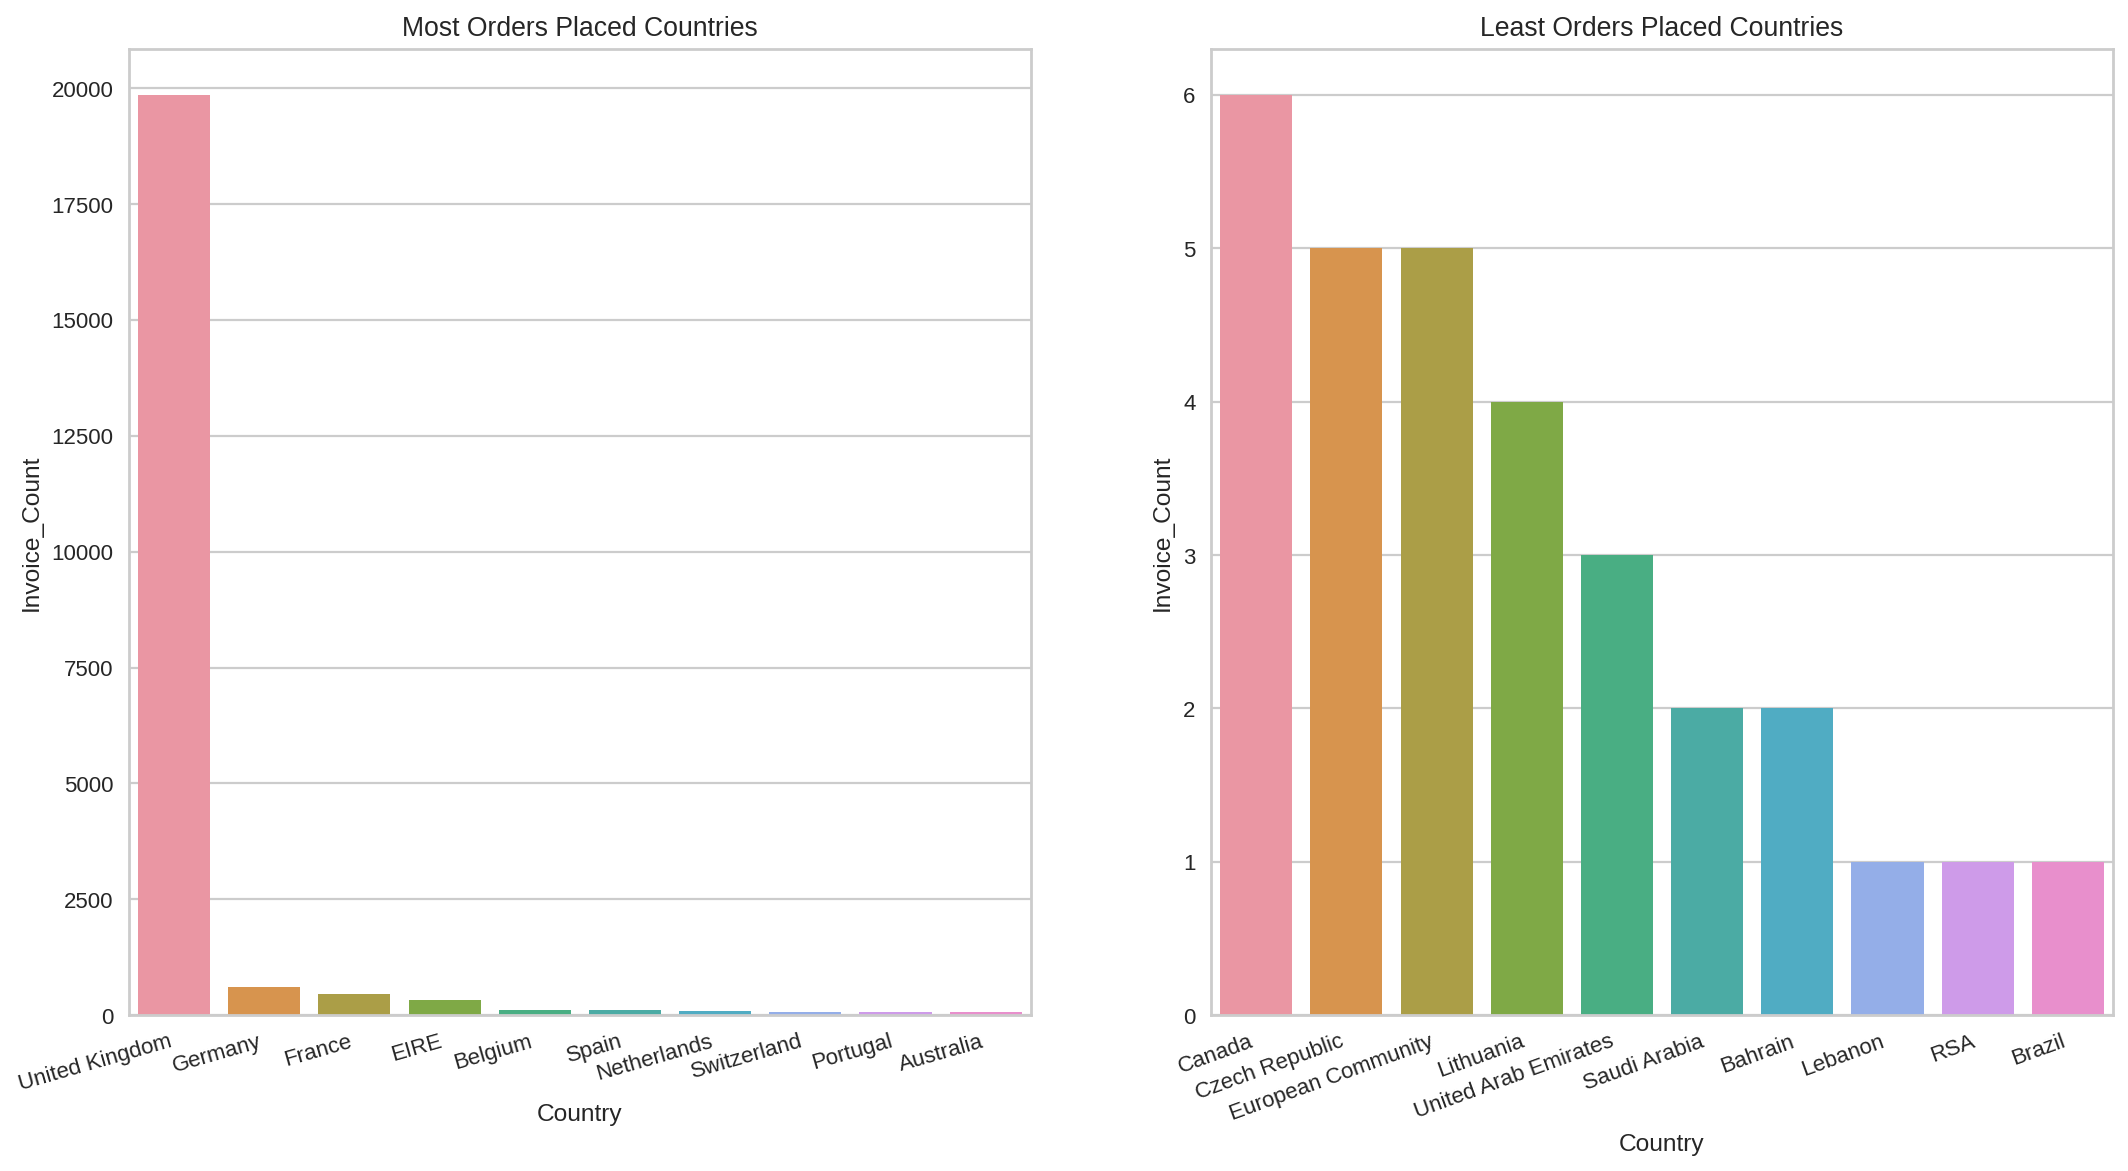

In [72]:
# Visualizing top and bottom 10 countries on the basis of total invoices 
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.xticks(rotation=16,ha='right')
plt.title("Most Orders Placed Countries")
sns.barplot(data=country_inv.head(10),x="Country",y="Invoice_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least Orders Placed Countries")
sns.barplot(data=country_inv.tail(10),x="Country",y="Invoice_Count")
plt.show()